# Quantum Time Evolution

In [44]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [45]:
def construct_hamiltonian(N, x, dx, h_bar, mass, q):
    potential =  (mass * x**2 * q**2)/2
    potential = np.diag(potential)

    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (2 * mass) * (finite_diff/dx**2)
    
    hamiltonian = kinetic + potential

    return hamiltonian

def taylor_series_expansion(matrix, terms, t):
    n = matrix.shape[0]
    identity = np.eye(n, dtype=np.complex128)
    result = identity.copy()
    matrix_power = matrix.copy()

    # Expand time evolution operator e^(-itH)
    for i in range(1, terms + 1):
        term = (matrix_power**i) * (t**i) * (-1j**i) / np.math.factorial(i)
        result += term

    return result

In [46]:
h_bar = 1#.05457e-35
mass = 1
q = 1
N = 250

x = np.linspace(-5, 5, N)
dx = x[1] - x[0]

H = construct_hamiltonian(N, x, dx, h_bar, mass, q)
print(H)

[[ 632.51       -310.005         0.         ...    0.
     0.            0.        ]
 [-310.005       632.31000323 -310.005      ...    0.
     0.            0.        ]
 [   0.         -310.005       632.11161933 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  632.11161933
  -310.005         0.        ]
 [   0.            0.            0.         ... -310.005
   632.31000323 -310.005     ]
 [   0.            0.            0.         ...    0.
  -310.005       632.51      ]]


Text(0, 0.5, 'Wavefunction')

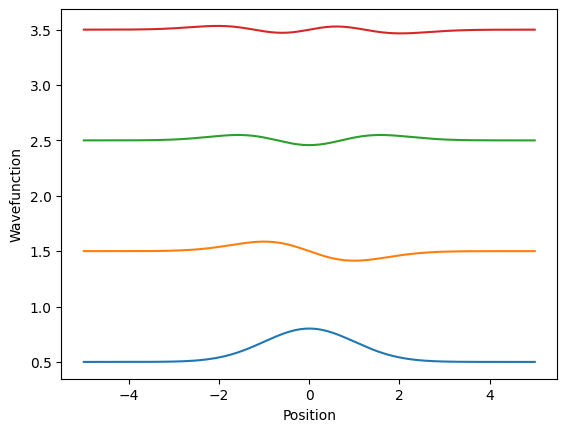

In [47]:
# Differences between sp and np?
#eigenvalues, eigenvectors = np.linalg.eigh(H)
eigenvalues, eigenvectors = sp.linalg.eigh(H)
initial_state = eigenvectors.copy()

for i in range(4):
    plt.plot(x, eigenvalues[i]+(initial_state[:,i]/eigenvalues[i]))
plt.xlabel("Position")
plt.ylabel("Wavefunction")

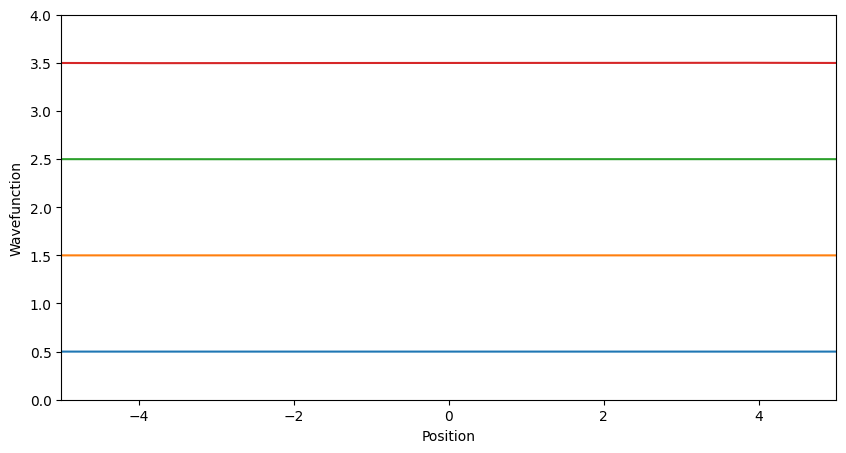

<Figure size 1000x500 with 0 Axes>

In [48]:
t = 0
t_max = 1
t_steps = 300
t_values = np.linspace(t, t_max, t_steps)
dt = t_values[1] - t_values[0]
count = 0
terms = 3

fig, ax = plt.subplots(figsize=(10, 5))

while t <= t_max:

    if t == 0:
        final_state = initial_state.copy()
        final_state = final_state/np.linalg.norm(final_state)
    
    else:

        teo = taylor_series_expansion(H, terms, dt)
        new_state = np.dot(teo, final_state)
        final_state = final_state.astype(np.complex128)
        final_state = new_state.copy()
        final_state = final_state/np.linalg.norm(final_state)

    for i in range(4):
        plt.plot(x, eigenvalues[i]+final_state[:,i])
    plt.xlim([-5,5])
    plt.ylim([-0,4])

    plt.xlabel("Position")
    plt.ylabel("Wavefunction")
    clear_output(wait=True)  
    display(fig) 
    fig.clear()

    t += dt
    count += 1

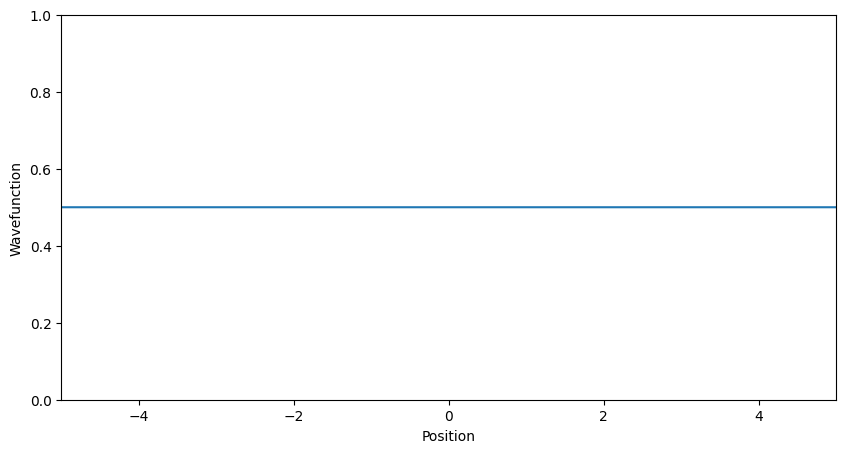

<Figure size 1000x500 with 0 Axes>

In [49]:
t = 0
count = 0

fig, ax = plt.subplots(figsize=(10, 5))

while t <= t_max:

    if t == 0:
        final_state = initial_state.copy()
        final_state = final_state/np.linalg.norm(final_state)
    
    else:

        teo = taylor_series_expansion(H, terms,  dt)
        new_state = np.dot(teo, final_state)
        final_state = final_state.astype(np.complex128)
        final_state = new_state.copy()
        final_state = final_state/np.linalg.norm(final_state)

    plt.plot(x, eigenvalues[0]+final_state[:,0])
    plt.xlim([-5,5])
    plt.ylim([-0,1])

    plt.xlabel("Position")
    plt.ylabel("Wavefunction")
    clear_output(wait=True)  
    display(fig) 
    fig.clear()

    t += dt
    count += 1

In [40]:
def run_simulation(Nx, Nt, terms):
    
    h_bar = 1
    mass = 1
    q = 1

    x = np.linspace(-5, 5, Nx)
    dx = x[1] - x[0]
    t = 0
    t_max = 1
    t_values = np.linspace(t, t_max, Nt)
    dt = t_values[1] - t_values[0]
    count = 0

    time_start = time.time()

    H = construct_hamiltonian(Nx, x, dx, h_bar, mass, q)

    eigenvalues, eigenvectors = sp.linalg.eigh(H)
    initial_state = eigenvectors.copy()
    #all_states = np.zeros((Nt, Nx, Nx), dtype=complex)

    while t <= t_max:

        if t == 0:
            final_state = initial_state.copy()
            final_state = final_state/np.linalg.norm(final_state)
            #all_states[count] = final_state

        else:

            teo = taylor_series_expansion(H, terms,  dt)
            new_state = np.dot(teo, final_state)
            final_state = final_state.astype(np.complex128)
            final_state = new_state.copy()
            final_state = final_state/np.linalg.norm(final_state)
            #all_states[count] = final_state

        t += dt
        count += 1

    time_finish = time.time()
    time_diff = time_finish - time_start
    
    return initial_state, final_state, time_diff#all_states, time_diff


In [41]:
dx = [50, 100, 150, 200, 250]
dt = [50, 100, 250, 500, 1000]
terms = [2, 3, 4, 5, 6, 7]

#test_is, testfs, testt = run_simulation(dx[3], dt[2], terms[3])
#print(testt)

times = []
All_states = []
for i in range(len(dx)):
    for j in range(len(terms)):
        i_state, f_state, timer = run_simulation(dx[i], dt[2], terms[j])
        times.append([dx[i], terms[j], timer])
        #All_states.append(a_states)
print(times)

dx_values = []
term_values = []
time_values = []

for i in range(len(times)):
    dx_values.append(times[i][0])
    term_values.append(times[i][1])
    time_values.append(times[i][2])
print(time_values)

C:\Users\kozy8\AppData\Local\Temp\ipykernel_5616\4254880222.py:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = (matrix_power**i) * (t**i) * (-1j**i) / np.math.factorial(i)


[[50, 2, 0.08265924453735352], [50, 3, 0.055481910705566406], [50, 4, 0.061398983001708984], [50, 5, 0.07003211975097656], [50, 6, 0.09880995750427246], [50, 7, 0.0842139720916748], [100, 2, 0.09989309310913086], [100, 3, 0.14329028129577637], [100, 4, 0.1828000545501709], [100, 5, 0.19061708450317383], [100, 6, 0.21862053871154785], [100, 7, 0.23444628715515137], [150, 2, 0.2366640567779541], [150, 3, 0.2707505226135254], [150, 4, 0.3291187286376953], [150, 5, 0.34325337409973145], [150, 6, 0.4632680416107178], [150, 7, 0.45191502571105957], [200, 2, 0.48310041427612305], [200, 3, 0.6954793930053711], [200, 4, 0.7794106006622314], [200, 5, 1.0546915531158447], [200, 6, 1.1575353145599365], [200, 7, 1.296184778213501], [250, 2, 1.1654009819030762], [250, 3, 1.192291021347046], [250, 4, 1.3437912464141846], [250, 5, 1.5722923278808594], [250, 6, 1.61875319480896], [250, 7, 1.8713865280151367]]
[0.08265924453735352, 0.055481910705566406, 0.061398983001708984, 0.07003211975097656, 0.09880

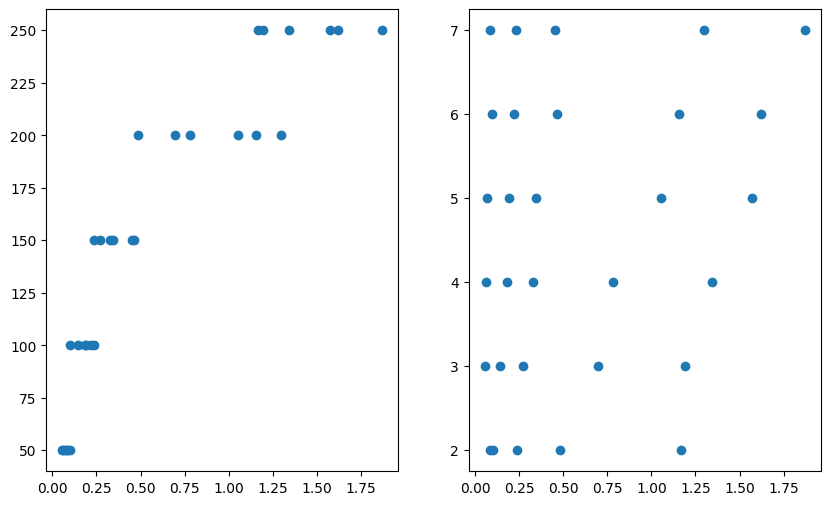

In [42]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(time_values, dx_values)
plt.xlabel()
plt.subplot(122)
plt.scatter(time_values, term_values)

In [51]:
def run_simulation_save(Nx, Nt, terms):
    
    h_bar = 1
    mass = 1
    q = 1

    x = np.linspace(-5, 5, Nx)
    dx = x[1] - x[0]
    t = 0
    t_max = 1
    t_values = np.linspace(t, t_max, Nt)
    dt = t_values[1] - t_values[0]
    count = 0

    time_start = time.time()

    H = construct_hamiltonian(Nx, x, dx, h_bar, mass, q)

    eigenvalues, eigenvectors = sp.linalg.eigh(H)
    initial_state = eigenvectors.copy()
    all_states = np.zeros((Nt, Nx, Nx), dtype=complex)

    while t <= t_max:

        if t == 0:
            final_state = initial_state.copy()
            final_state = final_state/np.linalg.norm(final_state)
            all_states[count] = final_state

        else:

            teo = taylor_series_expansion(H, terms,  dt)
            new_state = np.dot(teo, final_state)
            final_state = final_state.astype(np.complex128)
            final_state = new_state.copy()
            final_state = final_state/np.linalg.norm(final_state)
            all_states[count] = final_state

        t += dt
        count += 1

    time_finish = time.time()
    time_diff = time_finish - time_start
    
    return initial_state, final_state, all_states, time_diff

In [52]:
i_state2, f_state2, a_states2, timer2 = run_simulation_save(10000,250,7)

MemoryError: Unable to allocate 373. GiB for an array with shape (250, 10000, 10000) and data type complex128